In [1]:
import pandas as pd

df_import = pd.read_csv(r"C:\Users\user\Downloads\import_code\country_haveweapon.csv")

In [4]:
df_import.columns

Index(['Country', 'Value', 'Category'], dtype='object')

In [5]:

# Country와 Category별 Value 합계 계산
df_grouped = df_import.groupby(['Country', 'Category'], as_index=False)['Value'].sum()

# 결과 저장
df_grouped.to_csv(r"C:\Users\user\Downloads\import_code\grouped_import_data.csv", index=False)

# 출력 확인
print(df_grouped)

     Country  Category  Value
0    Albania         6     65
1    Albania         7    933
2    Albania         8     69
3    Albania        20      3
4    Algeria         2    490
..       ...       ...    ...
722   Zambia         2     42
723   Zambia         4     50
724   Zambia         7    259
725   Zambia         8    167
726   Zambia         9     29

[727 rows x 3 columns]


In [6]:
# Country와 Category별 Value 합계 계산
df_grouped = df_import.groupby(['Country', 'Category'], as_index=False)['Value'].sum()

# 데이터를 Country를 기준으로, Category를 열로 변환
df_pivot = df_grouped.pivot(index='Country', columns='Category', values='Value')

# 열 이름 변경 (Category별 Value를 명확히 구분하기 위해)
df_pivot.columns = [f"Value_{col}" for col in df_pivot.columns]
df_pivot = df_pivot.fillna(0)
# 인덱스 리셋
df_pivot = df_pivot.reset_index()

In [7]:
df_pivot

,Country,Value_2,Value_4,Value_6,Value_7,Value_8,Value_9,Value_20
0,Albania,0.0,0.0,65.0,933.0,69.0,0.0,3.0
1,Algeria,490.0,176.0,143.0,9159.0,1251.0,68.0,7.0
2,Angola,360.0,115.0,92.0,782.0,684.0,48.0,5.0
3,Argentina,332.0,32.0,57.0,1218.0,532.0,59.0,4.0
4,Armenia,188.0,150.0,0.0,865.0,150.0,12.0,0.0
...,...,...,...,...,...,...,...,...
143,Uruguay,70.0,0.0,26.0,513.0,90.0,11.0,2.0
144,Uzbekistan,1023.0,109.0,0.0,1135.0,478.0,2.0,0.0
145,Vanuatu,0.0,0.0,5.0,0.0,0.0,0.0,0.0
146,Vietnam,2724.0,1100.0,112.0,4695.0,750.0,25.0,6.0


In [8]:
# 결과 저장
df_pivot.to_csv(r"C:\Users\user\Downloads\import_code\pivot_import_data.csv", index=False)

# 출력 확인
print(df_pivot)

        Country  Value_2  Value_4  Value_6  Value_7  Value_8  Value_9  \
0       Albania      0.0      0.0     65.0    933.0     69.0      0.0   
1       Algeria    490.0    176.0    143.0   9159.0   1251.0     68.0   
2        Angola    360.0    115.0     92.0    782.0    684.0     48.0   
3     Argentina    332.0     32.0     57.0   1218.0    532.0     59.0   
4       Armenia    188.0    150.0      0.0    865.0    150.0     12.0   
..          ...      ...      ...      ...      ...      ...      ...   
143     Uruguay     70.0      0.0     26.0    513.0     90.0     11.0   
144  Uzbekistan   1023.0    109.0      0.0   1135.0    478.0      2.0   
145     Vanuatu      0.0      0.0      5.0      0.0      0.0      0.0   
146     Vietnam   2724.0   1100.0    112.0   4695.0    750.0     25.0   
147      Zambia     42.0     50.0      0.0    259.0    167.0     29.0   

     Value_20  
0         3.0  
1         7.0  
2         5.0  
3         4.0  
4         0.0  
..        ...  
143       2

In [9]:
df_import = pd.read_csv(r"C:\Users\user\Downloads\import_code\country_import_sum.csv")

In [10]:

# 데이터를 Country를 기준으로, Category를 열로 변환
df_pivot = df_grouped.pivot(index='Country', columns='Category', values='Value').fillna(0)
df_pivot.columns = [f"Value_{col}" for col in df_pivot.columns]
df_pivot = df_pivot.reset_index()

# df_import 데이터와 df_pivot 병합 (Country 기준)
df_merged = pd.merge(df_import, df_pivot, on='Country', how='outer').fillna(0)

# 결과 저장
df_merged.to_csv(r"C:\Users\user\Downloads\import_code\merged_import_data.csv", index=False)

# 출력 확인
print(df_merged)

                 Country  import_sum_1  import_sum_2  import_sum_4  \
0                Albania         706.0         665.0        1188.0   
1                Algeria        1395.0         438.0       35112.0   
2                 Angola        1850.0         521.0        5818.0   
3    Antigua and Barbuda           0.0           0.0           0.0   
4              Argentina         872.0         167.0        3327.0   
..                   ...           ...           ...           ...   
152              Uruguay         118.0          56.0         145.0   
153           Uzbekistan           0.0           0.0         167.0   
154              Vanuatu           0.0           0.0           0.0   
155              Vietnam        6305.0        2619.0       25715.0   
156               Zambia         110.0          42.0         635.0   

     import_sum_6  import_sum_7  import_sum_8  import_sum_9  import_sum_11  \
0            19.0        1218.0         248.0          82.0           28.0   
1  

In [11]:
# 수치형 열만 선택
df_numeric = df_merged.select_dtypes(include=["float64", "int64"])

# 0 값이 있는 열 제거
df_non_zero = df_numeric.loc[:, (df_numeric != 0).any(axis=0)]

# 상관관계 계산
correlation = df_non_zero.corr()

In [12]:
correlation

,import_sum_1,import_sum_2,import_sum_4,import_sum_6,import_sum_7,import_sum_8,import_sum_9,import_sum_11,import_sum_12,import_sum_15,import_sum_20,Value_2,Value_4,Value_6,Value_7,Value_8,Value_9,Value_20
import_sum_1,1.000000,0.609149,0.686165,0.411600,0.797337,0.483349,0.473601,0.688515,0.156699,0.195494,0.566479,0.492109,0.468581,0.423613,0.422735,0.203586,0.212409,0.339606
import_sum_2,0.609149,1.000000,0.484087,0.749751,0.614592,0.609375,0.581345,0.707378,0.135560,0.131158,0.649000,0.921997,0.701983,0.722191,0.548146,0.464685,0.416409,0.668914
import_sum_4,0.686165,0.484087,1.000000,0.535610,0.817959,0.664500,0.515482,0.773695,0.270862,0.187722,0.492820,0.503605,0.362728,0.456397,0.575680,0.397446,0.417666,0.445958
import_sum_6,0.411600,0.749751,0.535610,1.000000,0.593309,0.790716,0.745672,0.663128,0.317188,0.110555,0.790556,0.748778,0.569261,0.805265,0.598533,0.573270,0.547751,0.784588
import_sum_7,0.797337,0.614592,0.817959,0.593309,1.000000,0.763768,0.714680,0.764440,0.211503,0.269991,0.596946,0.551295,0.588124,0.565202,0.737159,0.541505,0.559348,0.584135
import_sum_8,0.483349,0.609375,0.664500,0.790716,0.763768,1.000000,0.869904,0.745554,0.221877,0.107244,0.572468,0.608413,0.631504,0.708302,0.888870,0.864364,0.849621,0.835909
import_sum_9,0.473601,0.581345,0.515482,0.745672,0.714680,0.869904,1.000000,0.667009,0.397773,0.236202,0.684751,0.515560,0.618086,0.741140,0.782950,0.700068,0.717146,0.794555
import_sum_11,0.688515,0.707378,0.773695,0.663128,0.764440,0.745554,0.667009,1.000000,0.207030,0.123088,0.587478,0.662007,0.601123,0.599920,0.612423,0.499044,0.465651,0.591067
import_sum_12,0.156699,0.135560,0.270862,0.317188,0.211503,0.221877,0.397773,0.207030,1.000000,0.171095,0.479997,0.065288,0.086030,0.271504,0.150686,0.073750,0.123959,0.219241
import_sum_15,0.195494,0.131158,0.187722,0.110555,0.269991,0.107244,0.236202,0.123088,0.171095,1.000000,0.176370,0.100442,0.199525,0.209138,0.188878,0.049091,0.089920,0.160674


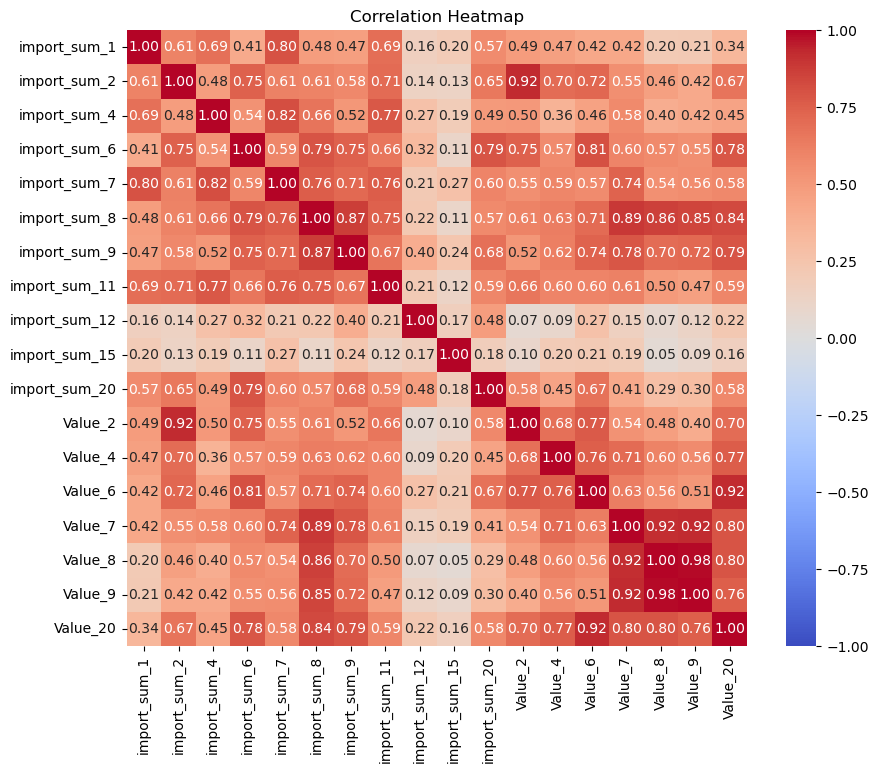

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
df_merged

,Country,import_sum_1,import_sum_2,import_sum_4,import_sum_6,import_sum_7,import_sum_8,import_sum_9,import_sum_11,import_sum_12,import_sum_15,import_sum_20,Value_2,Value_4,Value_6,Value_7,Value_8,Value_9,Value_20
0,Albania,706.0,665.0,1188.0,19.0,1218.0,248.0,82.0,28.0,0.0,0.0,5.0,0.0,0.0,65.0,933.0,69.0,0.0,3.0
1,Algeria,1395.0,438.0,35112.0,133.0,7333.0,1456.0,197.0,61.0,1.0,0.0,14.0,490.0,176.0,143.0,9159.0,1251.0,68.0,7.0
2,Angola,1850.0,521.0,5818.0,28.0,3472.0,820.0,86.0,43.0,0.0,0.0,0.0,360.0,115.0,92.0,782.0,684.0,48.0,5.0
3,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,872.0,167.0,3327.0,106.0,1869.0,1661.0,342.0,134.0,1.0,0.0,19.0,332.0,32.0,57.0,1218.0,532.0,59.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Uruguay,118.0,56.0,145.0,31.0,607.0,286.0,132.0,0.0,0.0,0.0,9.0,70.0,0.0,26.0,513.0,90.0,11.0,2.0
153,Uzbekistan,0.0,0.0,167.0,0.0,451.0,57.0,6.0,0.0,0.0,0.0,0.0,1023.0,109.0,0.0,1135.0,478.0,2.0,0.0
154,Vanuatu,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
155,Vietnam,6305.0,2619.0,25715.0,110.0,5690.0,1342.0,165.0,803.0,0.0,0.0,10.0,2724.0,1100.0,112.0,4695.0,750.0,25.0,6.0


In [15]:
df_gdp = pd.read_csv(r"C:\Users\user\Downloads\import_code\GDP_2023.csv")

In [16]:
df_merged.to_csv(r"C:\Users\user\Downloads\import_code\contrey_import_sum_1128.csv")

In [17]:
df_merged = pd.read_csv(r"C:\Users\user\Downloads\import_code\contrey_import_sum_1128.csv")

In [18]:
df_merged 

,Unnamed: 0,Country,import_sum_1,import_sum_2,import_sum_4,import_sum_6,import_sum_7,import_sum_8,import_sum_9,import_sum_11,import_sum_12,import_sum_15,import_sum_20,Value_2,Value_4,Value_6,Value_7,Value_8,Value_9,Value_20
0,0,Albania,706.0,665.0,1188.0,19.0,1218.0,248.0,82.0,28.0,0.0,0.0,5.0,0.0,0.0,65.0,933.0,69.0,0.0,3.0
1,1,Algeria,1395.0,438.0,35112.0,133.0,7333.0,1456.0,197.0,61.0,1.0,0.0,14.0,490.0,176.0,143.0,9159.0,1251.0,68.0,7.0
2,2,Angola,1850.0,521.0,5818.0,28.0,3472.0,820.0,86.0,43.0,0.0,0.0,0.0,360.0,115.0,92.0,782.0,684.0,48.0,5.0
3,3,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Argentina,872.0,167.0,3327.0,106.0,1869.0,1661.0,342.0,134.0,1.0,0.0,19.0,332.0,32.0,57.0,1218.0,532.0,59.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,Uruguay,118.0,56.0,145.0,31.0,607.0,286.0,132.0,0.0,0.0,0.0,9.0,70.0,0.0,26.0,513.0,90.0,11.0,2.0
153,153,Uzbekistan,0.0,0.0,167.0,0.0,451.0,57.0,6.0,0.0,0.0,0.0,0.0,1023.0,109.0,0.0,1135.0,478.0,2.0,0.0
154,154,Vanuatu,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
155,155,Vietnam,6305.0,2619.0,25715.0,110.0,5690.0,1342.0,165.0,803.0,0.0,0.0,10.0,2724.0,1100.0,112.0,4695.0,750.0,25.0,6.0


In [19]:
df_mermer = pd.merge(df_gdp, df_merged, on='Country', how='outer')

In [20]:
df_mermer

,Country,2023,Unnamed: 0,import_sum_1,import_sum_2,import_sum_4,import_sum_6,import_sum_7,import_sum_8,import_sum_9,...,import_sum_12,import_sum_15,import_sum_20,Value_2,Value_4,Value_6,Value_7,Value_8,Value_9,Value_20
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.240000e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Western and Central,7.970000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,2.297768e+10,0.0,706.0,665.0,1188.0,19.0,1218.0,248.0,82.0,...,0.0,0.0,5.0,0.0,0.0,65.0,933.0,69.0,0.0,3.0
4,Algeria,2.400000e+11,1.0,1395.0,438.0,35112.0,133.0,7333.0,1456.0,197.0,...,1.0,0.0,14.0,490.0,176.0,143.0,9159.0,1251.0,68.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,West Bank and Gaza,1.739630e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,World,1.050000e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,Zambia,2.816263e+10,156.0,110.0,42.0,635.0,1.0,372.0,237.0,107.0,...,0.0,0.0,0.0,42.0,50.0,0.0,259.0,167.0,29.0,0.0


In [21]:
# 각 행의 결측치 개수를 확인하고 5개 이상인 행 제거
df_mermer = df_mermer[df_mermer.isnull().sum(axis=1) < 5]

# 결과 확인
print(df_mermer)

                 Country          2023  Unnamed: 0  import_sum_1  \
3                Albania  2.297768e+10         0.0         706.0   
4                Algeria  2.400000e+11         1.0        1395.0   
7                 Angola  8.472296e+10         2.0        1850.0   
8    Antigua and Barbuda  2.033085e+09         3.0           0.0   
10             Argentina  6.410000e+11         4.0         872.0   
..                   ...           ...         ...           ...   
268              Uruguay  7.724083e+10       152.0         118.0   
269           Uzbekistan  9.088915e+10       153.0           0.0   
270              Vanuatu  1.126313e+09       154.0           0.0   
273              Vietnam           NaN       155.0        6305.0   
278               Zambia  2.816263e+10       156.0         110.0   

     import_sum_2  import_sum_4  import_sum_6  import_sum_7  import_sum_8  \
3           665.0        1188.0          19.0        1218.0         248.0   
4           438.0       35112

In [22]:
df_mermer.to_csv(r"C:\Users\user\Downloads\import_code\contrey_import_sum_gdp_1128.csv")

In [62]:
# gdp 결측치 채우고 불러옴
df_mermer = pd.read_csv(r"C:\Users\user\Downloads\import_code\country_import_sum_gdp_1128.csv")

In [63]:
df_mermer

,Country,2023_gdp,import_sum_1,import_sum_2,import_sum_4,import_sum_6,import_sum_7,import_sum_8,import_sum_9,import_sum_11,import_sum_12,import_sum_15,import_sum_20,Value_2,Value_4,Value_6,Value_7,Value_8,Value_9,Value_20
0,Albania,2.297768e+10,706,665,1188,19,1218,248,82,28,0,0,5,0,0,65,933,69,0,3
1,Algeria,2.400000e+11,1395,438,35112,133,7333,1456,197,61,1,0,14,490,176,143,9159,1251,68,7
2,Angola,8.472296e+10,1850,521,5818,28,3472,820,86,43,0,0,0,360,115,92,782,684,48,5
3,Antigua and Barbuda,2.033085e+09,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
4,Argentina,6.410000e+11,872,167,3327,106,1869,1661,342,134,1,0,19,332,32,57,1218,532,59,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Uruguay,7.724083e+10,118,56,145,31,607,286,132,0,0,0,9,70,0,26,513,90,11,2
153,Uzbekistan,9.088915e+10,0,0,167,0,451,57,6,0,0,0,0,1023,109,0,1135,478,2,0
154,Vanuatu,1.126313e+09,0,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,0
155,Vietnam,4.297000e+11,6305,2619,25715,110,5690,1342,165,803,0,0,10,2724,1100,112,4695,750,25,6


In [64]:
df_mermer.columns

Index(['Country', '2023_gdp', 'import_sum_1', 'import_sum_2', 'import_sum_4',
       'import_sum_6', 'import_sum_7', 'import_sum_8', 'import_sum_9',
       'import_sum_11', 'import_sum_12', 'import_sum_15', 'import_sum_20',
       'Value_2', 'Value_4', 'Value_6', 'Value_7', 'Value_8', 'Value_9',
       'Value_20'],
      dtype='object')

In [65]:
# 지정된 열을 나누어 새로운 데이터를 생성
columns_to_divide = ['import_sum_2', 'import_sum_4', 'import_sum_6', 'import_sum_7', 
                     'import_sum_8', 'import_sum_9', 'import_sum_20']
divisors = ['Value_2', 'Value_4', 'Value_6', 'Value_7', 'Value_8', 'Value_9', 'Value_20']

# 새로운 열 이름을 생성
new_columns = [f'{num}_divided' for num in columns_to_divide]

# 새로운 열 계산
for col, divisor, new_col in zip(columns_to_divide, divisors, new_columns):
    # 0인 값을 1로 대체
    df_mermer[new_col] = df_mermer[col] / df_mermer[divisor].replace(0, 1)

# 결과 확인
print(df_mermer[new_columns])


     import_sum_2_divided  import_sum_4_divided  import_sum_6_divided  \
0              665.000000           1188.000000              0.292308   
1                0.893878            199.500000              0.930070   
2                1.447222             50.591304              0.304348   
3                0.000000              0.000000              0.000000   
4                0.503012            103.968750              1.859649   
..                    ...                   ...                   ...   
152              0.800000            145.000000              1.192308   
153              0.000000              1.532110              0.000000   
154              0.000000              0.000000              0.400000   
155              0.961454             23.377273              0.982143   
156              1.000000             12.700000              1.000000   

     import_sum_7_divided  import_sum_8_divided  import_sum_9_divided  \
0                1.305466              3.594203   

In [67]:
# 나라 이름, GDP, 새로 계산한 열들만 추출
selected_columns = ['Country', '2023_gdp'] + new_columns
new_df = df_mermer[selected_columns]

# 결과 확인
print(new_df)

                 Country      2023_gdp  import_sum_2_divided  \
0                Albania  2.297768e+10            665.000000   
1                Algeria  2.400000e+11              0.893878   
2                 Angola  8.472296e+10              1.447222   
3    Antigua and Barbuda  2.033085e+09              0.000000   
4              Argentina  6.410000e+11              0.503012   
..                   ...           ...                   ...   
152              Uruguay  7.724083e+10              0.800000   
153           Uzbekistan  9.088915e+10              0.000000   
154              Vanuatu  1.126313e+09              0.000000   
155              Vietnam  4.297000e+11              0.961454   
156               Zambia  2.816263e+10              1.000000   

     import_sum_4_divided  import_sum_6_divided  import_sum_7_divided  \
0             1188.000000              0.292308              1.305466   
1              199.500000              0.930070              0.800633   
2           

In [70]:
# 지정된 열과 대응 열
columns_to_divide = ['import_sum_2', 'import_sum_4', 'import_sum_6', 'import_sum_7', 
                     'import_sum_8', 'import_sum_9', 'import_sum_20']
divisors = ['Value_2', 'Value_4', 'Value_6', 'Value_7', 'Value_8', 'Value_9', 'Value_20']

# 새로운 열 이름 생성
new_columns = [f'{num}_divided' for num in columns_to_divide]

# 나누기 계산 (0인 경우 1로 대체)
for col, divisor, new_col in zip(columns_to_divide, divisors, new_columns):
    df_mermer[new_col] = df_mermer[col] / df_mermer[divisor].replace(0, 1)

# 새로 계산한 열들의 합 구하기
df_mermer['sum_of_new_columns'] = df_mermer[new_columns].sum(axis=1)

# 결과 확인
print(df_mermer[['Country', 'sum_of_new_columns']])



                 Country  sum_of_new_columns
0                Albania         1941.858643
1                Algeria          208.185508
2                 Angola           59.773269
3    Antigua and Barbuda            2.000000
4              Argentina          121.534685
..                   ...                 ...
152              Uruguay          167.853321
153           Uzbekistan            5.048714
154              Vanuatu            0.400000
155              Vietnam           36.588797
156               Zambia           21.245110

[157 rows x 2 columns]


In [71]:
# sum_of_new_columns를 new_df에 추가
new_df['sum_of_new_columns'] = df_mermer['sum_of_new_columns']

# 결과 확인
print(new_df)


                 Country      2023_gdp  import_sum_2_divided  \
0                Albania  2.297768e+10            665.000000   
1                Algeria  2.400000e+11              0.893878   
2                 Angola  8.472296e+10              1.447222   
3    Antigua and Barbuda  2.033085e+09              0.000000   
4              Argentina  6.410000e+11              0.503012   
..                   ...           ...                   ...   
152              Uruguay  7.724083e+10              0.800000   
153           Uzbekistan  9.088915e+10              0.000000   
154              Vanuatu  1.126313e+09              0.000000   
155              Vietnam  4.297000e+11              0.961454   
156               Zambia  2.816263e+10              1.000000   

     import_sum_4_divided  import_sum_6_divided  import_sum_7_divided  \
0             1188.000000              0.292308              1.305466   
1              199.500000              0.930070              0.800633   
2           

C:\Users\user\AppData\Local\Temp\ipykernel_19656\3867494039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sum_of_new_columns'] = df_mermer['sum_of_new_columns']


In [72]:
new_df.to_csv(r"C:\Users\user\Downloads\import_code\country_gdp_import_1128.csv")

In [24]:
new_df = pd.read_csv(r"C:\Users\user\Downloads\import_code\country_gdp_import_1128.csv")

In [25]:
# 새로운 df_new 데이터프레임 생성
df_new = df_mermer[['Country', '2023_gdp']]  # 'Country', '2023_gdp' 열을 가져옵니다.

# 나누기 처리 후 추가한 열들을 'sum_of_new_columns'로 나눈 값 추가
for col in new_columns:
    # 해당 열을 'sum_of_new_columns'로 나누어 새로운 열을 추가
    new_col_name = f'{col}_divided_by_sum'
    df_new[new_col_name] = df_mermer[col] / df_mermer['sum_of_new_columns'].replace(0, 1)

# 결과 확인
print(df_new)

KeyError: "['2023_gdp'] not in index"

In [76]:
df_new.columns

Index(['Country', '2023_gdp', 'import_sum_2_divided_divided_by_sum',
       'import_sum_4_divided_divided_by_sum',
       'import_sum_6_divided_divided_by_sum',
       'import_sum_7_divided_divided_by_sum',
       'import_sum_8_divided_divided_by_sum',
       'import_sum_9_divided_divided_by_sum',
       'import_sum_20_divided_divided_by_sum'],
      dtype='object')

In [77]:
# 'import_sum_*_divided_divided_by_sum' 열에 '2023_gdp'를 곱해줌
for col in new_columns:
    new_col_name = f'{col}_divided_by_sum'
    new_col_name_gdp = f'{new_col_name}_gdp'
    df_new[new_col_name_gdp] = df_new[new_col_name] * df_new['2023_gdp']

# 결과 확인
print(df_new)

                 Country      2023_gdp  import_sum_2_divided_divided_by_sum  \
0                Albania  2.297768e+10                             0.342455   
1                Algeria  2.400000e+11                             0.004294   
2                 Angola  8.472296e+10                             0.024212   
3    Antigua and Barbuda  2.033085e+09                             0.000000   
4              Argentina  6.410000e+11                             0.004139   
..                   ...           ...                                  ...   
152              Uruguay  7.724083e+10                             0.004766   
153           Uzbekistan  9.088915e+10                             0.000000   
154              Vanuatu  1.126313e+09                             0.000000   
155              Vietnam  4.297000e+11                             0.026277   
156               Zambia  2.816263e+10                             0.047070   

     import_sum_4_divided_divided_by_sum  import_su

C:\Users\user\AppData\Local\Temp\ipykernel_19656\1306248344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[new_col_name_gdp] = df_new[new_col_name] * df_new['2023_gdp']
C:\Users\user\AppData\Local\Temp\ipykernel_19656\1306248344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[new_col_name_gdp] = df_new[new_col_name] * df_new['2023_gdp']
C:\Users\user\AppData\Local\Temp\ipykernel_19656\1306248344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [78]:
new_df.to_csv(r"C:\Users\user\Downloads\import_code\country_multiple_1128.csv")

In [97]:
df_new = pd.read_csv(r"C:\Users\user\Downloads\import_code\country_multiple_1128.csv")

In [98]:
data3 = pd.read_csv(r"C:\Users\user\Downloads\import_code\3data.csv")

In [99]:
df_new3 = pd.merge(df_new, data3, on = 'Country', how = 'outer')

In [107]:
df_new3.to_csv(r"C:\Users\user\Downloads\import_code\country_1128.csv")

In [159]:
df_new3 = pd.merge(data3, data31, on = 'Country', how = 'outer')

In [162]:
df_new3.to_csv(r"C:\Users\user\Downloads\import_code\country_1128.csv")

In [2]:
# 등급 전처리 후 다시 불러옴
data3 = pd.read_csv(r"C:\Users\user\Downloads\import_code\country_1128.csv")

In [28]:
data3.columns

Index(['Country', '2023_gdp', 'import_sum_2_divided', 'import_sum_4_divided',
       'import_sum_6_divided', 'import_sum_7_divided', 'import_sum_8_divided',
       'import_sum_9_divided', 'import_sum_20_divided', 'sum_of_new_columns',
       'scaled_weighted_bd_high', 'Scaled Economic Indicator',
       'scaled_pctrank', 'average_score', 'Cluster'],
      dtype='object')

In [29]:
# 곱할 열 목록
columns_to_multiply = [
    'import_sum_2_divided', 'import_sum_4_divided', 
    'import_sum_6_divided', 'import_sum_7_divided', 
    'import_sum_8_divided', 'import_sum_9_divided', 
    'import_sum_20_divided'
]

# 각 열에 '2023_gdp'를 곱하기
for col in columns_to_multiply:
    data3[col] = data3[col] * data3['2023_gdp']

# 결과 확인
print(data3.head())

         Country  2023_gdp  import_sum_2_divided  import_sum_4_divided  \
0  United States  273600.0         148436.251229          1.672372e+07   
1          China  178000.0          67790.346988          1.991186e+06   
2        Germany   44600.0          78194.805184          7.791531e+07   
3          Japan   42100.0          39581.196574          1.241525e+07   
4          India   35500.0          13022.196265          2.553775e+07   

   import_sum_6_divided  import_sum_7_divided  import_sum_8_divided  \
0         330646.153766         146113.100222         170963.195602   
1         159957.115084         144980.168918         218808.946966   
2         118652.830167         128958.827215         186953.070671   
3         162178.325133          19828.507021          74866.277724   
4          43575.107290          54994.699011          60653.335927   

   import_sum_9_divided  import_sum_20_divided  sum_of_new_columns  \
0         146706.040397           42994.285675           6

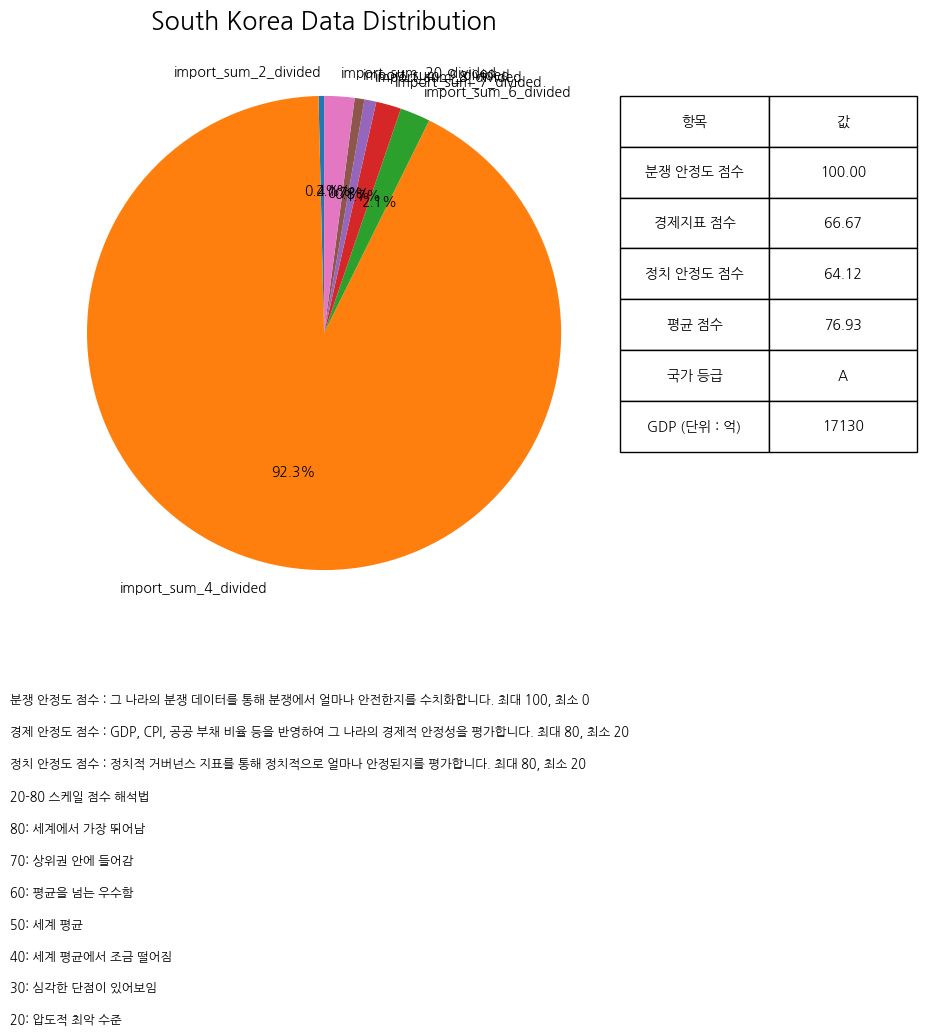

In [30]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 한글 폰트 설정
rcParams['font.family'] = 'NanumGothic'

# South_Korea 데이터 필터링
South_Korea_data = data3[data3['Country'] == 'South Korea']

# 원그래프에서 사용할 열 선택
columns_to_plot = ['import_sum_2_divided', 'import_sum_4_divided', 'import_sum_6_divided', 
                   'import_sum_7_divided', 'import_sum_8_divided', 'import_sum_9_divided', 
                   'import_sum_20_divided']

# South_Korea 데이터 값 (원그래프 데이터)
values = South_Korea_data[columns_to_plot].values.flatten()

# 원그래프 그리기
fig, ax = plt.subplots(figsize=(8, 8))  # 그래프 크기 크게 설정 (15x8)
ax.pie(values, labels=columns_to_plot, autopct='%1.1f%%', startangle=90)

# 제목 추가
plt.title('South Korea Data Distribution', fontsize=18)

# 제목과 차트 간의 간격 조정
plt.subplots_adjust(top=0.85, right=0.3, left=0.1, bottom=0.2)  # 오른쪽 여백을 더 확보

# 텍스트 항목을 표 형태로 그리기
text_items = [
    ('분쟁 안정도 점수', f'{South_Korea_data["scaled_weighted_bd_high"].values[0]:.2f}'),
    ('경제지표 점수', f'{South_Korea_data["Scaled Economic Indicator"].values[0]:.2f}'),
    ('정치 안정도 점수', f'{South_Korea_data["scaled_pctrank"].values[0]:.2f}'),
    ('평균 점수', f'{South_Korea_data["average_score"].values[0]:.2f}'),
    ('국가 등급', f'{South_Korea_data["Cluster"].values[0]}'),
    ('GDP (단위 : 억)', f'{South_Korea_data['2023_gdp'].values[0]:.0f}')
]

# 표로 텍스트 항목 표시
table_data = [(label, value) for label, value in text_items]
col_labels = ['항목', '값']  # 열 이름

# 테이블 추가 (bbox를 크게 하여 차트와 겹치지 않게 조정)
table = plt.table(cellText=table_data, colLabels=col_labels, loc='right', cellLoc='center', bbox=[1, 0.3, 0.5, 0.6])

# 테이블 스타일 설정
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(0.8, 1.5)  # 테이블 크기 조정

# 차트 하단에 추가 텍스트 넣기
explanation_text = [
    '분쟁 안정도 점수 : 그 나라의 분쟁 데이터를 통해 분쟁에서 얼마나 안전한지를 수치화합니다. 최대 100, 최소 0',
    '경제 안정도 점수 : GDP, CPI, 공공 부채 비율 등을 반영하여 그 나라의 경제적 안정성을 평가합니다. 최대 80, 최소 20',
    '정치 안정도 점수 : 정치적 거버넌스 지표를 통해 정치적으로 얼마나 안정된지를 평가합니다. 최대 80, 최소 20',
    '20-80 스케일 점수 해석법',
    '80: 세계에서 가장 뛰어남',
    '70: 상위권 안에 들어감',
    '60: 평균을 넘는 우수함',
    '50: 세계 평균',
    '40: 세계 평균에서 조금 떨어짐',
    '30: 심각한 단점이 있어보임',
    '20: 압도적 최악 수준'
]

# 하단 텍스트를 차트 아래에 표시 (line spacing 조정)
for i, line in enumerate(explanation_text):
    plt.figtext(0.1, 0.05 - i * 0.04, line, wrap=True, horizontalalignment='left', fontsize=9, va='top')


plt.tight_layout()
plt.show()

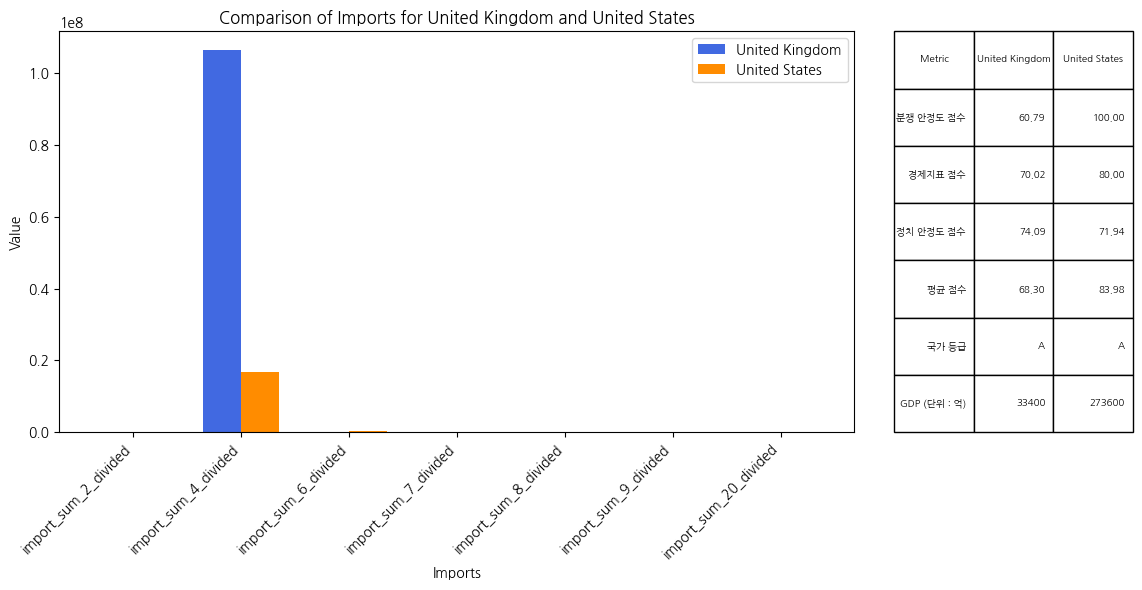

<Figure size 640x480 with 0 Axes>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터에서 두 나라 선택 (United Kingdom, United States)
uk_data = data3[data3['Country'] == 'United Kingdom']
us_data = data3[data3['Country'] == 'United States']

# 비교할 열 목록
columns_to_multiply = [
    'import_sum_2_divided', 'import_sum_4_divided', 
    'import_sum_6_divided', 'import_sum_7_divided', 
    'import_sum_8_divided', 'import_sum_9_divided', 
    'import_sum_20_divided'
]

# United Kingdom과 United States의 해당 열들에 대한 값을 추출
uk_values = uk_data[columns_to_multiply].values.flatten()
us_values = us_data[columns_to_multiply].values.flatten()

# 바 그래프 생성
x = np.arange(len(columns_to_multiply))  # x축 위치
width = 0.35  # 막대 너비

fig, ax = plt.subplots(figsize=(12, 6))  # 그래프 크기 설정

# United Kingdom과 United States에 대한 막대 그래프
ax.bar(x - width/2, uk_values, width, label='United Kingdom', color='royalblue')
ax.bar(x + width/2, us_values, width, label='United States', color='darkorange')

# 그래프의 세부 설정
ax.set_xlabel('Imports')
ax.set_ylabel('Value')
ax.set_title('Comparison of Imports for United Kingdom and United States')
ax.set_xticks(x)
ax.set_xticklabels(columns_to_multiply, rotation=45, ha='right')
ax.legend()

# 테이블에 추가할 값
table_data = [
    ('분쟁 안정도 점수', f'{uk_data["scaled_weighted_bd_high"].values[0]:.2f}', f'{us_data["scaled_weighted_bd_high"].values[0]:.2f}'),
    ('경제지표 점수', f'{uk_data["Scaled Economic Indicator"].values[0]:.2f}', f'{us_data["Scaled Economic Indicator"].values[0]:.2f}'),
    ('정치 안정도 점수', f'{uk_data["scaled_pctrank"].values[0]:.2f}', f'{us_data["scaled_pctrank"].values[0]:.2f}'),
    ('평균 점수', f'{uk_data["average_score"].values[0]:.2f}', f'{us_data["average_score"].values[0]:.2f}'),
    ('국가 등급', f'{uk_data["Cluster"].values[0]}', f'{us_data["Cluster"].values[0]}'),
    ('GDP (단위 : 억)', f'{uk_data["2023_gdp"].values[0]:.0f}', f'{us_data["2023_gdp"].values[0]:.0f}')
]
# 테이블 그리기 - 그래프 오른쪽에 배치
table_column_labels = ['Metric', 'United Kingdom', 'United States']
table = ax.table(cellText=table_data, colLabels=table_column_labels, loc='right', bbox=[1.05, 0, 0.3, 1])

# 테이블 글씨 크기 키우기
table.auto_set_font_size(False)
table.set_fontsize(7)

# 그래프 표시
plt.tight_layout()
plt.show()
# 그래프와 테이블을 포함한 그래프 저장
plt.tight_layout()  # 레이아웃을 자동으로 조정
plt.savefig('comparison_uk_vs_us.png', bbox_inches='tight')  # 그래프를 파일로 저장

# 그래프 표시
plt.show()

In [32]:
data3

,Country,2023_gdp,import_sum_2_divided,import_sum_4_divided,import_sum_6_divided,import_sum_7_divided,import_sum_8_divided,import_sum_9_divided,import_sum_20_divided,sum_of_new_columns,scaled_weighted_bd_high,Scaled Economic Indicator,scaled_pctrank,average_score,Cluster
0,United States,273600.000000,148436.251229,1.672372e+07,330646.153766,146113.100222,170963.195602,146706.040397,42994.285675,64.728004,100.00,80.000000,71.935528,83.978509,A
1,China,178000.000000,67790.346988,1.991186e+06,159957.115084,144980.168918,218808.946966,460170.454594,133500.000000,17.844907,78.24,77.154762,42.025036,65.806599,A
2,Germany,44600.000000,78194.805184,7.791531e+07,118652.830167,128958.827215,186953.070671,710753.191366,63714.285733,1775.841592,100.00,71.705722,75.191507,82.299076,A
3,Japan,42100.000000,39581.196574,1.241525e+07,162178.325133,19828.507021,74866.277724,60277.404930,165923.529429,307.313604,100.00,74.070301,72.311258,82.127186,A
4,India,35500.000000,13022.196265,2.553775e+07,43575.107290,54994.699011,60653.335927,45171.826610,79520.000000,727.737715,6.15,68.205271,46.828855,40.394709,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Micronesia,4.600000,0.000000,0.000000e+00,32.200000,0.000000,0.000000,0.000000,0.000000,7.000000,100.00,40.702032,58.226921,66.309651,B
152,Marshall Islands,2.840000,0.000000,0.000000e+00,1.704000,0.000000,0.000000,0.000000,0.000000,0.600000,100.00,51.392804,55.375931,68.922912,A
153,Kiribati,2.790344,0.000000,0.000000e+00,1.116137,0.000000,0.000000,0.000000,0.000000,0.400000,100.00,30.424829,55.736517,62.053782,B
154,Palau,2.630207,0.000000,0.000000e+00,7.890622,0.000000,0.000000,0.000000,0.000000,3.000000,100.00,42.343810,64.364359,68.902723,B


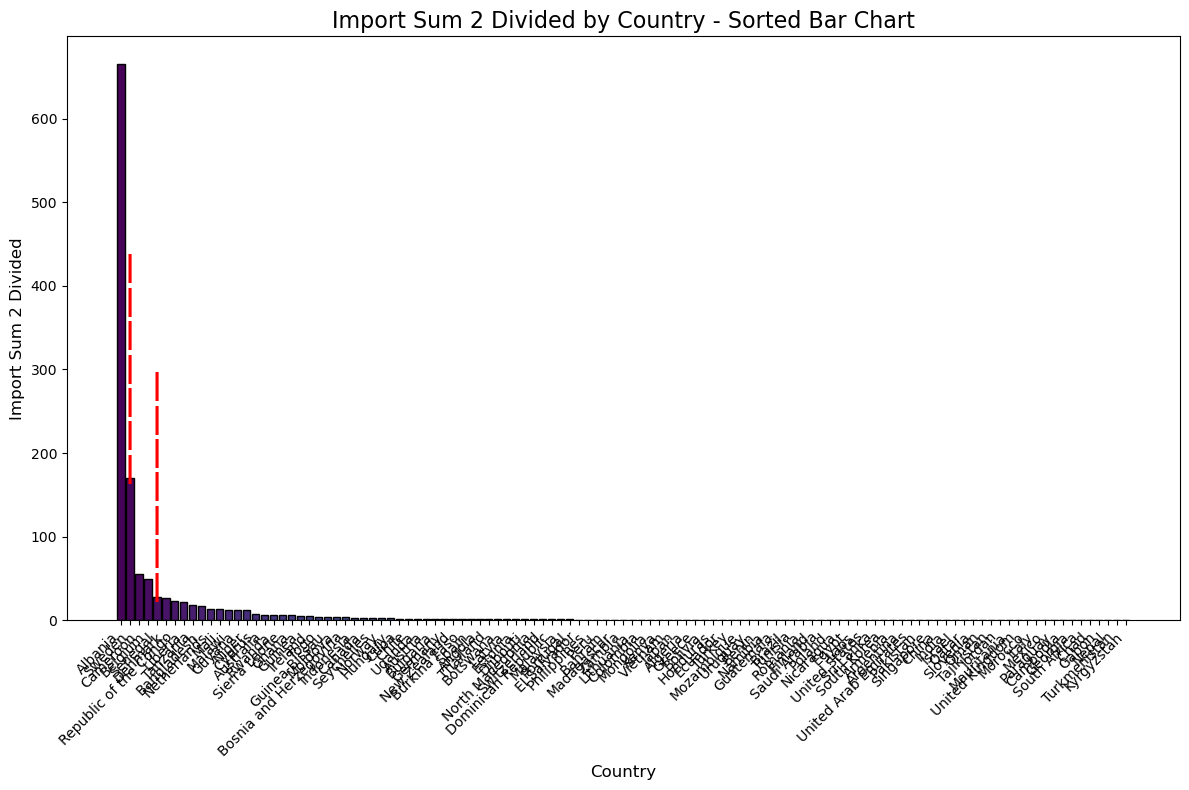

상위 1개 나라:
['Albania']
상위 4개 나라:
['Albania', 'Sweden', 'Cameroon', 'Belgium']


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정렬 및 필터링
if 'import_sum_2_divided' in data3.columns and 'Country' in data3.columns:
    # NaN 제거 및 import_sum_20_divided가 0보다 큰 값만 선택
    sorted_data = data3[['Country', 'import_sum_2_divided']].dropna()
    sorted_data = sorted_data[sorted_data['import_sum_2_divided'] > 0]
    sorted_data = sorted_data.sort_values(by='import_sum_2_divided', ascending=False)  # 내림차순 정렬
else:
    raise ValueError("'Country' 또는 'import_sum_2_divided' 열이 data3에 존재하지 않습니다.")

# 색상 팔레트 설정
colors = sns.color_palette("viridis", len(sorted_data))  # "viridis"는 눈에 잘 띄는 그라데이션 팔레트

# 막대그래프 그리기
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['Country'], sorted_data['import_sum_2_divided'], color=colors, edgecolor='black')

# 그래프 제목 및 축 레이블
plt.title('Import Sum 2 Divided by Country - Sorted Bar Chart', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Import Sum 2 Divided', fontsize=12)

# x축 레이블 각도 조정 (국가명이 겹치지 않도록)
plt.xticks(rotation=45, fontsize=10, ha='right')

# 상위 5번째와 11번째 나라 막대 위에 값 표시
top_1_value = sorted_data.iloc[1]['import_sum_2_divided']
top_4_value = sorted_data.iloc[4]['import_sum_2_divided']

plt.text(
    x=1,  # 5번째 막대의 x좌표 (0부터 시작하므로 4)
    y=top_1_value + top_1_value * 0.01,  # 5번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 화살표 기호
    ha='center', color='red', fontsize=20, fontweight='bold'
)

plt.text(
    x=4,  # 11번째 막대의 x좌표 (0부터 시작하므로 10)
    y=top_4_value + top_4_value * 0.1,  # 11번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 더 긴 세로선
    ha='center', color='red', fontsize=20, fontweight='bold'
)
# 그래프 표시
plt.tight_layout()
plt.show()

# 상위 10개 나라 이름 추출
top_1_countries = sorted_data.head(1)['Country'].tolist()

# 결과 출력
print("상위 1개 나라:")
print(top_1_countries)
# 상위 10개 나라 이름 추출
top_4_countries = sorted_data.head(4)['Country'].tolist()

# 결과 출력
print("상위 4개 나라:")
print(top_4_countries)

Import Sum 2 코멘트

알바니아와 스웨덴 두 나라, 특히 알바니아에서 보유량 대비 수요량이 매우 높게 나타나는 것을 확인할 수 있다. 알바니아가 전체 수요 예측량의 50%를 넘어가는 것을 확인할 수 있다. 스웨덴과 카메룬, 벨기에도 카테고리 2번 수출에 주목할만한 나라들로 보인다.

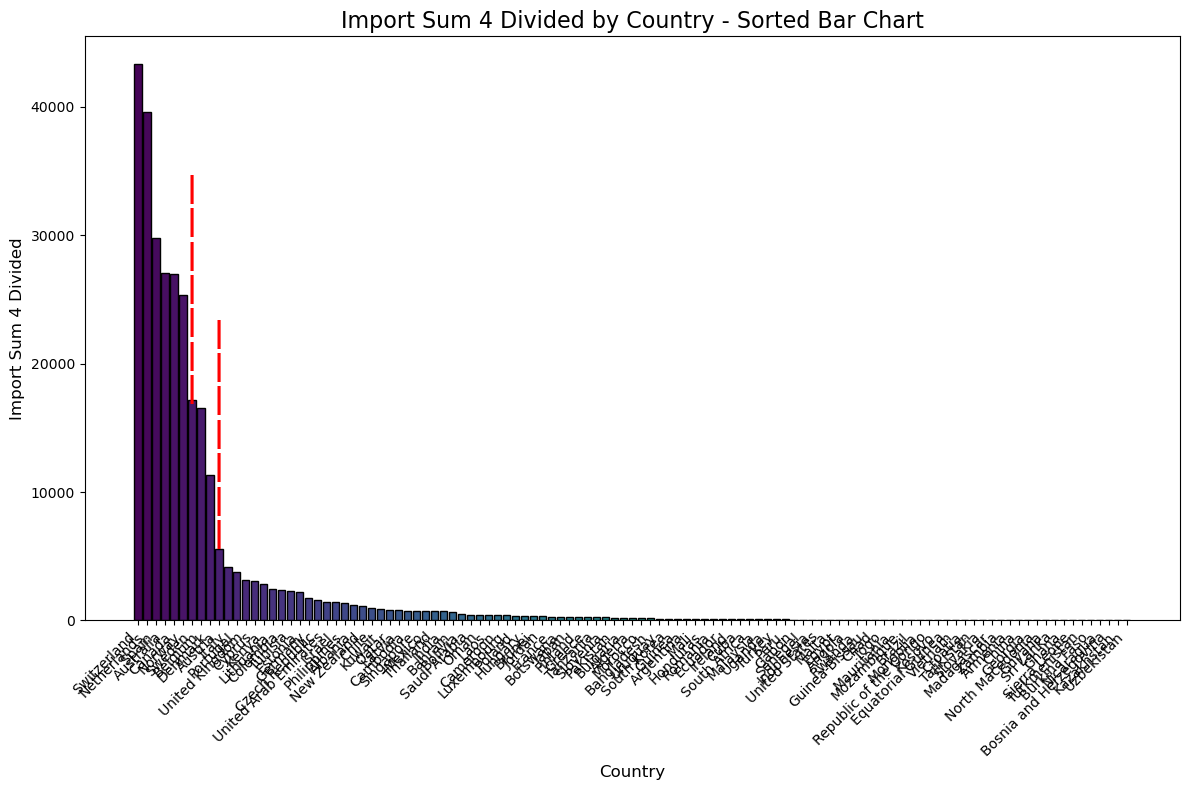

상위 6개 나라:
['Switzerland', 'Netherlands', 'Spain', 'Australia', 'Canada', 'Norway']
상위 9개 나라:
['Switzerland', 'Netherlands', 'Spain', 'Australia', 'Canada', 'Norway', 'Sweden', 'Belgium', 'Denmark']


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정렬 및 필터링
if 'import_sum_4_divided' in data3.columns and 'Country' in data3.columns:
    # NaN 제거 및 import_sum_20_divided가 0보다 큰 값만 선택
    sorted_data = data3[['Country', 'import_sum_4_divided']].dropna()
    sorted_data = sorted_data[sorted_data['import_sum_4_divided'] > 0]
    sorted_data = sorted_data.sort_values(by='import_sum_4_divided', ascending=False)  # 내림차순 정렬
else:
    raise ValueError("'Country' 또는 'import_sum_4_divided' 열이 data3에 존재하지 않습니다.")

# 색상 팔레트 설정
colors = sns.color_palette("viridis", len(sorted_data))  # "viridis"는 눈에 잘 띄는 그라데이션 팔레트

# 막대그래프 그리기
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_data['Country'], sorted_data['import_sum_4_divided'], color=colors, edgecolor='black')

# 그래프 제목 및 축 레이블
plt.title('Import Sum 4 Divided by Country - Sorted Bar Chart', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Import Sum 4 Divided', fontsize=12)

# x축 레이블 각도 조정 (국가명이 겹치지 않도록)
plt.xticks(rotation=45, fontsize=10, ha='right')

# 상위 5번째와 11번째 나라 막대 위에 값 표시
top_6_value = sorted_data.iloc[6]['import_sum_4_divided']
top_9_value = sorted_data.iloc[9]['import_sum_4_divided']

plt.text(
    x=6,  # 5번째 막대의 x좌표 (0부터 시작하므로 4)
    y=top_6_value + top_6_value * 0.01,  # 5번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 화살표 기호
    ha='center', color='red', fontsize=20, fontweight='bold'
)

plt.text(
    x=9,  # 11번째 막대의 x좌표 (0부터 시작하므로 10)
    y=top_9_value + top_9_value * 0.1,  # 11번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 더 긴 세로선
    ha='center', color='red', fontsize=20, fontweight='bold'
)

# 그래프 표시
plt.tight_layout()
plt.show()

# 상위 10개 나라 이름 추출
top_6_countries = sorted_data.head(6)['Country'].tolist()

# 결과 출력
print("상위 6개 나라:")
print(top_6_countries)
# 상위 10개 나라 이름 추출
top_9_countries = sorted_data.head(9)['Country'].tolist()

# 결과 출력
print("상위 9개 나라:")
print(top_9_countries)

Import Sum 4 코멘트

카테고리 4에서는 스위스와 네덜란드가 다른 나라에 비해 많은 보유량 대비 수요량이 그래프에 보이는 것을 확인할 수 있다. 스페인, 호주, 캐나다와 노르웨이도 이 두 나라보다는 아니지만 꽤 높은 수요량이 있는 것으로 예측이 되고 있고, 스웨덴과 벨기에, 덴마크도 상위 6개 나라보다는 떨어지지만 수요량이 꽤 예측되고 있는 것을 확인할 수 있다. 

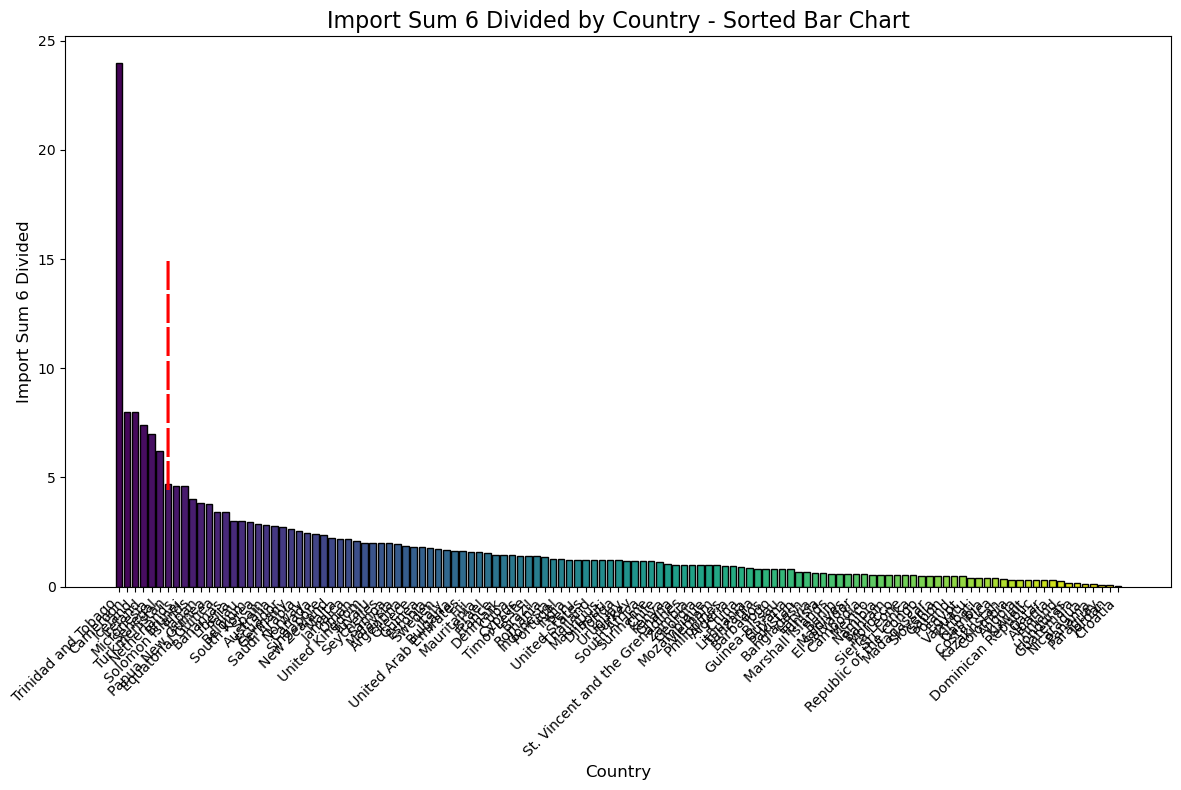

상위 6개 나라:
['Trinidad and Tobago', 'Cameroon', 'Iceland', 'Ireland', 'Micronesia', 'Senegal']


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정렬 및 필터링
if 'import_sum_6_divided' in data3.columns and 'Country' in data3.columns:
    # NaN 제거 및 import_sum_20_divided가 0보다 큰 값만 선택
    sorted_data = data3[['Country', 'import_sum_6_divided']].dropna()
    sorted_data = sorted_data[sorted_data['import_sum_6_divided'] > 0]
    sorted_data = sorted_data.sort_values(by='import_sum_6_divided', ascending=False)  # 내림차순 정렬
else:
    raise ValueError("'Country' 또는 'import_sum_6_divided' 열이 data3에 존재하지 않습니다.")

# 색상 팔레트 설정
colors = sns.color_palette("viridis", len(sorted_data))  # "viridis"는 눈에 잘 띄는 그라데이션 팔레트

# 막대그래프 그리기
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['Country'], sorted_data['import_sum_6_divided'], color=colors, edgecolor='black')

# 그래프 제목 및 축 레이블
plt.title('Import Sum 6 Divided by Country - Sorted Bar Chart', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Import Sum 6 Divided', fontsize=12)

# x축 레이블 각도 조정 (국가명이 겹치지 않도록)
plt.xticks(rotation=45, fontsize=10, ha='right')

# 상위 5번째와 11번째 나라 막대 위에 값 표시
top_6_value = sorted_data.iloc[6]['import_sum_6_divided']
top_14_value = sorted_data.iloc[14]['import_sum_6_divided']

plt.text(
    x=6,  # 5번째 막대의 x좌표 (0부터 시작하므로 4)
    y=top_6_value + top_6_value * 0.01,  # 5번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 화살표 기호
    ha='center', color='red', fontsize=20, fontweight='bold'
)


# 그래프 표시
plt.tight_layout()
plt.show()

# 상위 10개 나라 이름 추출
top_6_countries = sorted_data.head(6)['Country'].tolist()

# 결과 출력
print("상위 6개 나라:")
print(top_6_countries)

Import Sum 6 코멘트

이 카테고리에서는 트리니다드 토바고가 압도적인 수요량을 보이고 있음을 확인할 수 있다. 그 뒤를 카메룬, 아이슬란드, 아일랜드, 미크로네시아, 세네갈이 수요량을 높게 보임을 확인할 수 있다. 이 카테고리에서는 다른 카테고리랑은 다르게 이외의 나라도 일정 수준의 수요량을 보이고있기에 이 나라에 집중하는 것도 좋겠지만 다른 나라를 배제하지 않는 것이 좋아보인다.

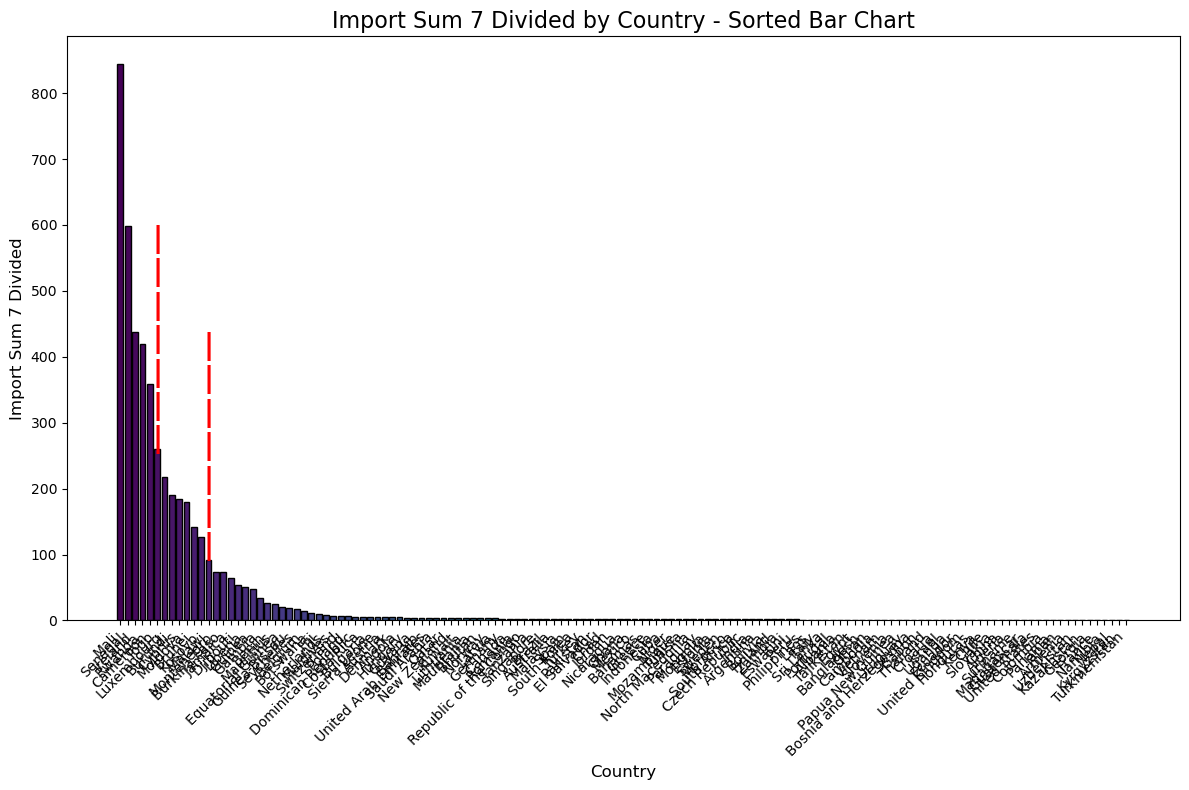

상위 5개 나라:
['Mali', 'Senegal', 'Ireland', 'Rwanda', 'Cameroon']
상위 12개 나라:
['Mali', 'Senegal', 'Ireland', 'Rwanda', 'Cameroon', 'Togo', 'Luxembourg', 'Burundi', 'Cyprus', 'Moldova', 'Brunei', 'Kosovo']


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정렬 및 필터링
if 'import_sum_7_divided' in data3.columns and 'Country' in data3.columns:
    # NaN 제거 및 import_sum_20_divided가 0보다 큰 값만 선택
    sorted_data = data3[['Country', 'import_sum_7_divided']].dropna()
    sorted_data = sorted_data[sorted_data['import_sum_7_divided'] > 0]
    sorted_data = sorted_data.sort_values(by='import_sum_7_divided', ascending=False)  # 내림차순 정렬
else:
    raise ValueError("'Country' 또는 'import_sum_7_divided' 열이 data3에 존재하지 않습니다.")

# 색상 팔레트 설정
colors = sns.color_palette("viridis", len(sorted_data))  # "viridis"는 눈에 잘 띄는 그라데이션 팔레트

# 막대그래프 그리기
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['Country'], sorted_data['import_sum_7_divided'], color=colors, edgecolor='black')

# 그래프 제목 및 축 레이블
plt.title('Import Sum 7 Divided by Country - Sorted Bar Chart', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Import Sum 7 Divided', fontsize=12)

# x축 레이블 각도 조정 (국가명이 겹치지 않도록)
plt.xticks(rotation=45, fontsize=10, ha='right')

# 상위 5번째와 11번째 나라 막대 위에 값 표시
top_5_value = sorted_data.iloc[5]['import_sum_7_divided']
top_12_value = sorted_data.iloc[12]['import_sum_7_divided']

plt.text(
    x=5,  # 5번째 막대의 x좌표 (0부터 시작하므로 4)
    y=top_5_value + top_5_value * 0.01,  # 5번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 화살표 기호
    ha='center', color='red', fontsize=20, fontweight='bold'
)

plt.text(
    x=12,  # 11번째 막대의 x좌표 (0부터 시작하므로 10)
    y=top_12_value + top_12_value * 0.1,  # 11번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 더 긴 세로선
    ha='center', color='red', fontsize=20, fontweight='bold'
)
# 그래프 표시
plt.tight_layout()
plt.show()

# 상위 10개 나라 이름 추출
top_5_countries = sorted_data.head(5)['Country'].tolist()

# 결과 출력
print("상위 5개 나라:")
print(top_5_countries)
# 상위 10개 나라 이름 추출
top_12_countries = sorted_data.head(12)['Country'].tolist()

# 결과 출력
print("상위 12개 나라:")
print(top_12_countries)

Import Sum 7 코멘트

이 카테고리에서는 말리와 세네갈이 높은 수요량을 보이고 있다. 그 뒤를 아일랜드, 르완다, 카메룬 등 국가가 수요량의 뒤를 잇고 있지만, 이 카테고리에서도 10개 이상의 나라가 수요량이 꽤 보이는 것을 확인할 수 있다. 상위 5개 나라에 집중하면서도 그 뒤를 잇는 나라를 눈여겨보고 있는 것도 좋아보인다.

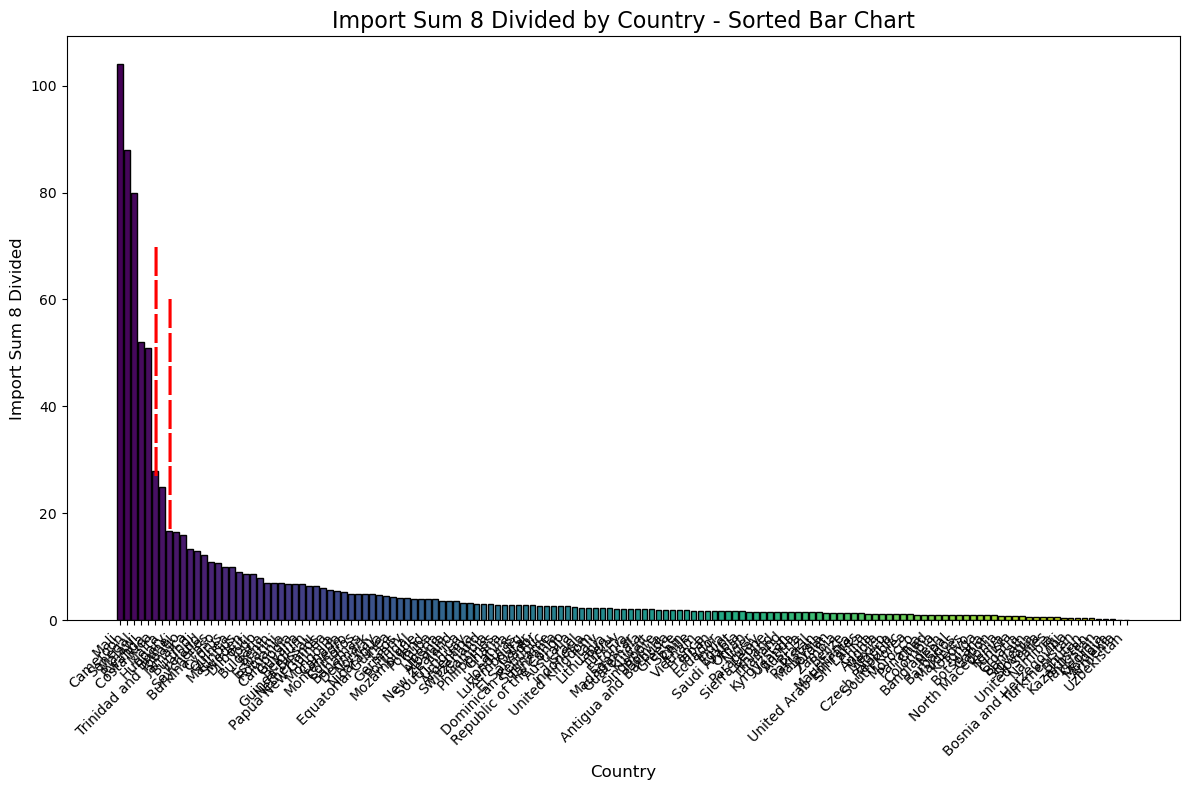

상위 5개 나라:
['Mali', 'Cameroon', 'Senegal', 'Malawi', 'Rwanda']
상위 7개 나라:
['Mali', 'Cameroon', 'Senegal', 'Malawi', 'Rwanda', 'Costa Rica', 'Malta']


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정렬 및 필터링
if 'import_sum_8_divided' in data3.columns and 'Country' in data3.columns:
    # NaN 제거 및 import_sum_20_divided가 0보다 큰 값만 선택
    sorted_data = data3[['Country', 'import_sum_8_divided']].dropna()
    sorted_data = sorted_data[sorted_data['import_sum_8_divided'] > 0]
    sorted_data = sorted_data.sort_values(by='import_sum_8_divided', ascending=False)  # 내림차순 정렬
else:
    raise ValueError("'Country' 또는 'import_sum_8_divided' 열이 data3에 존재하지 않습니다.")

# 색상 팔레트 설정
colors = sns.color_palette("viridis", len(sorted_data))  # "viridis"는 눈에 잘 띄는 그라데이션 팔레트

# 막대그래프 그리기
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['Country'], sorted_data['import_sum_8_divided'], color=colors, edgecolor='black')

# 그래프 제목 및 축 레이블
plt.title('Import Sum 8 Divided by Country - Sorted Bar Chart', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Import Sum 8 Divided', fontsize=12)

# x축 레이블 각도 조정 (국가명이 겹치지 않도록)
plt.xticks(rotation=45, fontsize=10, ha='right')

# 상위 5번째와 11번째 나라 막대 위에 값 표시
top_5_value = sorted_data.iloc[5]['import_sum_8_divided']
top_7_value = sorted_data.iloc[7]['import_sum_8_divided']

plt.text(
    x=5,  # 5번째 막대의 x좌표 (0부터 시작하므로 4)
    y=top_5_value + top_5_value * 0.01,  # 5번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 화살표 기호
    ha='center', color='red', fontsize=20, fontweight='bold'
)

plt.text(
    x=7,  # 11번째 막대의 x좌표 (0부터 시작하므로 10)
    y=top_7_value + top_7_value * 0.1,  # 11번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 더 긴 세로선
    ha='center', color='red', fontsize=20, fontweight='bold'
)
# 그래프 표시
plt.tight_layout()
plt.show()

# 상위 10개 나라 이름 추출
top_5_countries = sorted_data.head(5)['Country'].tolist()

# 결과 출력
print("상위 5개 나라:")
print(top_5_countries)
# 상위 10개 나라 이름 추출
top_7_countries = sorted_data.head(7)['Country'].tolist()

# 결과 출력
print("상위 7개 나라:")
print(top_7_countries)


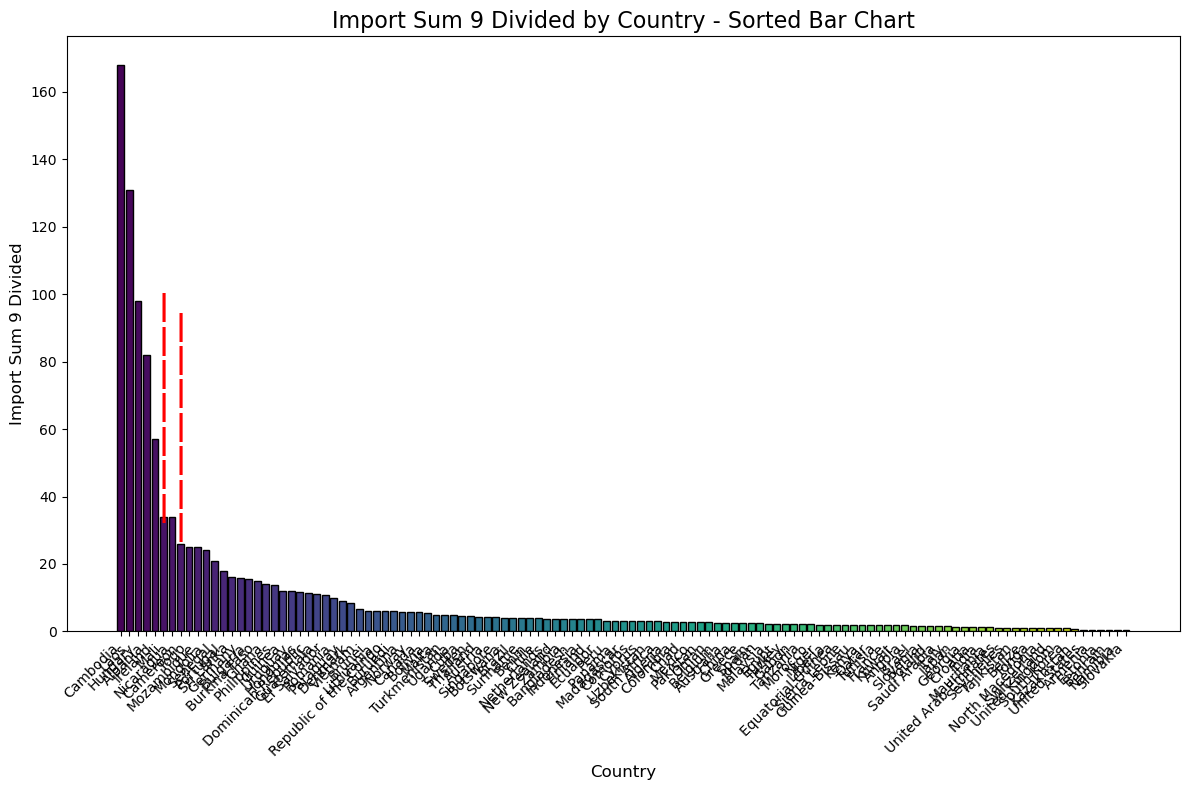

상위 5개 나라:
['Cambodia', 'Laos', 'Hungary', 'Albania', 'Ireland']
상위 7개 나라:
['Cambodia', 'Laos', 'Hungary', 'Albania', 'Ireland', 'Mali', 'Nicaragua']


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정렬 및 필터링
if 'import_sum_9_divided' in data3.columns and 'Country' in data3.columns:
    # NaN 제거 및 import_sum_20_divided가 0보다 큰 값만 선택
    sorted_data = data3[['Country', 'import_sum_9_divided']].dropna()
    sorted_data = sorted_data[sorted_data['import_sum_9_divided'] > 0]
    sorted_data = sorted_data.sort_values(by='import_sum_9_divided', ascending=False)  # 내림차순 정렬
else:
    raise ValueError("'Country' 또는 'import_sum_9_divided' 열이 data3에 존재하지 않습니다.")

# 색상 팔레트 설정
colors = sns.color_palette("viridis", len(sorted_data))  # "viridis"는 눈에 잘 띄는 그라데이션 팔레트

# 막대그래프 그리기
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['Country'], sorted_data['import_sum_9_divided'], color=colors, edgecolor='black')

# 그래프 제목 및 축 레이블
plt.title('Import Sum 9 Divided by Country - Sorted Bar Chart', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Import Sum 9 Divided', fontsize=12)

# x축 레이블 각도 조정 (국가명이 겹치지 않도록)
plt.xticks(rotation=45, fontsize=10, ha='right')

# 상위 5번째와 11번째 나라 막대 위에 값 표시
top_5_value = sorted_data.iloc[5]['import_sum_9_divided']
top_7_value = sorted_data.iloc[7]['import_sum_9_divided']

plt.text(
    x=5,  # 5번째 막대의 x좌표 (0부터 시작하므로 4)
    y=top_5_value + top_5_value * 0.01,  # 5번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 화살표 기호
    ha='center', color='red', fontsize=20, fontweight='bold'
)

plt.text(
    x=7,  # 11번째 막대의 x좌표 (0부터 시작하므로 10)
    y=top_7_value + top_7_value * 0.1,  # 11번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 더 긴 세로선
    ha='center', color='red', fontsize=20, fontweight='bold'
)
# 그래프 표시
plt.tight_layout()
plt.show()

# 상위 10개 나라 이름 추출
top_5_countries = sorted_data.head(5)['Country'].tolist()

# 결과 출력
print("상위 5개 나라:")
print(top_5_countries)
# 상위 10개 나라 이름 추출
top_7_countries = sorted_data.head(7)['Country'].tolist()

# 결과 출력
print("상위 7개 나라:")
print(top_7_countries)


Import Sum 9 코멘트

캄보디아가 가장 많은 수요량을 보이고, 라오스, 헝가리, 알바니아, 아일랜드 순으로 다음 수요량을 보이는 것을 알 수 있다. 다른 난라들도 일정 수준의 수요량을 보이고 있지만, 니카라과와 말리까지 이 7개국에 우선적으로 집중하는 것이 좋아보인다. 

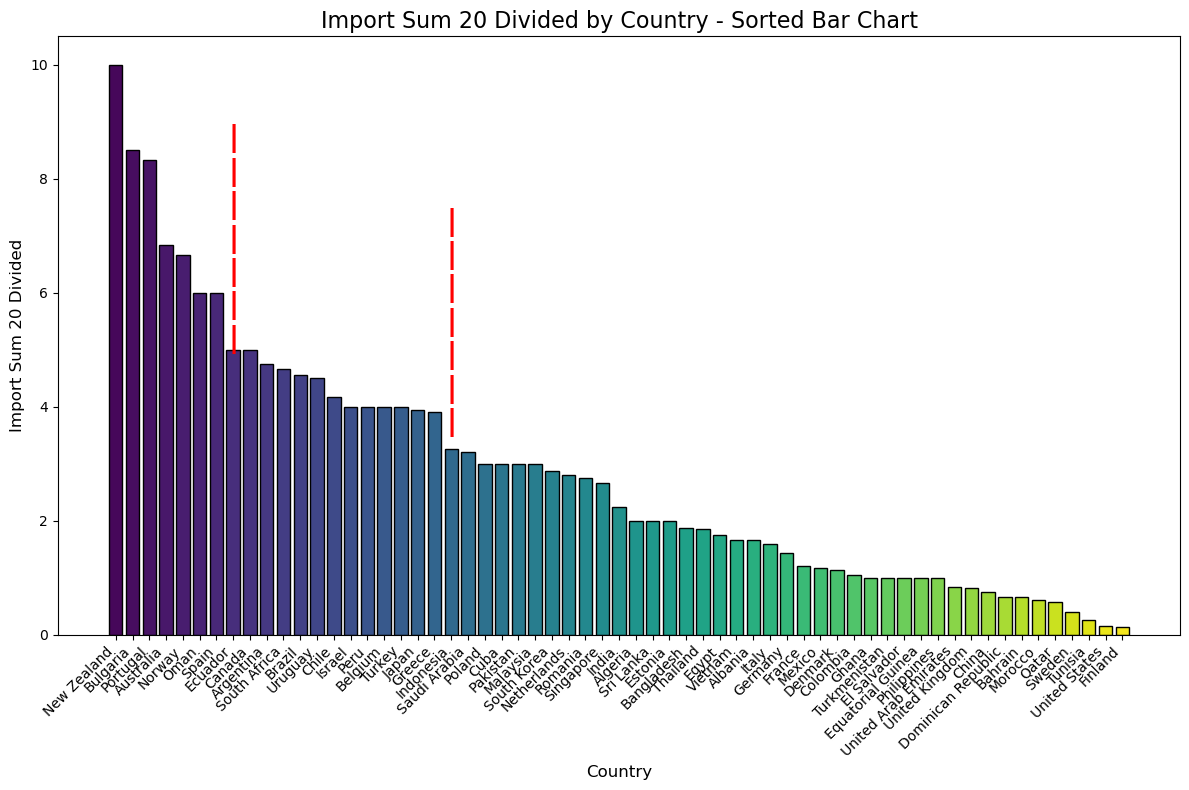

상위 7개 나라:
['New Zealand', 'Bulgaria', 'Portugal', 'Australia', 'Norway', 'Oman', 'Spain']
상위 20개 나라:
['New Zealand', 'Bulgaria', 'Portugal', 'Australia', 'Norway', 'Oman', 'Spain', 'Ecuador', 'Canada', 'Argentina', 'South Africa', 'Brazil', 'Uruguay', 'Chile', 'Israel', 'Peru', 'Belgium', 'Turkey', 'Japan', 'Greece']


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정렬 및 필터링
if 'import_sum_20_divided' in data3.columns and 'Country' in data3.columns:
    # NaN 제거 및 import_sum_20_divided가 0보다 큰 값만 선택
    sorted_data = data3[['Country', 'import_sum_20_divided']].dropna()
    sorted_data = sorted_data[sorted_data['import_sum_20_divided'] > 0]
    sorted_data = sorted_data.sort_values(by='import_sum_20_divided', ascending=False)  # 내림차순 정렬
else:
    raise ValueError("'Country' 또는 'import_sum_20_divided' 열이 data3에 존재하지 않습니다.")

# 색상 팔레트 설정
colors = sns.color_palette("viridis", len(sorted_data))  # "viridis"는 눈에 잘 띄는 그라데이션 팔레트

# 막대그래프 그리기
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['Country'], sorted_data['import_sum_20_divided'], color=colors, edgecolor='black')

# 그래프 제목 및 축 레이블
plt.title('Import Sum 20 Divided by Country - Sorted Bar Chart', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Import Sum 20 Divided', fontsize=12)

# x축 레이블 각도 조정 (국가명이 겹치지 않도록)
plt.xticks(rotation=45, fontsize=10, ha='right')

# 상위 5번째와 11번째 나라 막대 위에 값 표시
top_7_value = sorted_data.iloc[7]['import_sum_20_divided']
top_20_value = sorted_data.iloc[20]['import_sum_20_divided']

plt.text(
    x=7,  # 5번째 막대의 x좌표 (0부터 시작하므로 4)
    y=top_7_value + top_7_value * 0.01,  # 5번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 화살표 기호
    ha='center', color='red', fontsize=20, fontweight='bold'
)

plt.text(
    x=20,  # 11번째 막대의 x좌표 (0부터 시작하므로 10)
    y=top_20_value + top_20_value * 0.1,  # 11번째 값 바로 위에 표시
    s='|\n|\n|\n|\n|\n|\n|',  # 더 긴 세로선
    ha='center', color='red', fontsize=20, fontweight='bold'
)
# 그래프 표시
plt.tight_layout()
plt.show()

# 상위 10개 나라 이름 추출
top_7_countries = sorted_data.head(7)['Country'].tolist()

# 결과 출력
print("상위 7개 나라:")
print(top_7_countries)
# 상위 10개 나라 이름 추출
top_20_countries = sorted_data.head(20)['Country'].tolist()

# 결과 출력
print("상위 20개 나라:")
print(top_20_countries)

Import Sum 20 코멘트

이 카테고리에서는 특정 나라가 압도적인 수요를 보이는 나라가 있지 않다. 그 대신 상위 20개 국가에서 일정 수준 이상의 수요를 보이는 것을 확인할 수 있다. 이 카테고리에서는 수요를 보이는 나라가 다른 카테고리보다 많이 적으므로, 수요가 있는 나라들을 상위 나라부터 순서대로 조금씩 집중하는 것이 좋아보인다.

Import Sum 2 코멘트

알바니아와 스웨덴 두 나라, 특히 알바니아에서 보유량 대비 수요량이 매우 높게 나타나는 것을 확인할 수 있다. 알바니아가 전체 수요 예측량의 50%를 넘어가는 것을 확인할 수 있다. 스웨덴과 카메룬, 벨기에도 카테고리 2번 수출에 주목할만한 나라들로 보인다.

Import Sum 4 코멘트

카테고리 4에서는 스위스와 네덜란드가 다른 나라에 비해 많은 보유량 대비 수요량이 그래프에 보이는 것을 확인할 수 있다. 스페인, 호주, 캐나다와 노르웨이도 이 두 나라보다는 아니지만 꽤 높은 수요량이 있는 것으로 예측이 되고 있고, 스웨덴과 벨기에, 덴마크도 상위 6개 나라보다는 떨어지지만 수요량이 꽤 예측되고 있는 것을 확인할 수 있다.

Import Sum 6 코멘트

이 카테고리에서는 트리니다드 토바고가 압도적인 수요량을 보이고 있음을 확인할 수 있다. 그 뒤를 카메룬, 아이슬란드, 아일랜드, 미크로네시아, 세네갈이 수요량을 높게 보임을 확인할 수 있다. 이 카테고리에서는 다른 카테고리랑은 다르게  이외의 나라도 일정 수준의 수요량을 보이고있기에 이 나라에 집중하는 것도 좋겠지만 다른 나라를 배제하지 않는 것이 좋아보인다.


Import Sum 7 코멘트

이 카테고리에서는 말리와 세네갈이 높은 수요량을 보이고 있다. 그 뒤를 아일랜드, 르완다, 카메룬 등 국가가 수요량의 뒤를 잇고 있지만, 이 카테고리에서도 10개 이상의 나라가 수요량이 꽤 보이는 것을 확인할 수 있다. 상위 5개 나라에 집중하면서도 그 뒤를 잇는 나라를 눈여겨보고 있는 것도 좋아보인다.

Import Sum 8 코멘트

이 카테고리에서도 말리와 카메룬, 세네갈이 높은 수요량을 보이는 것을 확인할 수 있다. 그 뒤를 높은 수요량을 보이는 나라도 있지만, 이 카테고리도 전체적으로 수요량이 어느 정도 있는 그래프를 확인할 수 있다. 우선은 상위 몇 나라에 집중하면서 거래하되, 그 뒤를 잇는 나라를 눈여겨 보는 것이 좋을 것 같다.

Import Sum 9 코멘트

캄보디아가 가장 많은 수요량을 보이고, 라오스, 헝가리, 알바니아, 아일랜드 순으로 다음 수요량을 보이는 것을 알 수 있다. 다른 난라들도 일정 수준의 수요량을 보이고 있지만, 니카라과와 말리까지 이 7개국에 우선적으로 집중하는 것이 좋아보인다.

Import Sum 20 코멘트

이 카테고리에서는 특정 나라가 압도적인 수요를 보이는 나라가 있지 않다. 그 대신 상위 20개 국가에서 일정 수준 이상의 수요를 보이는 것을 확인할 수 있다. 이 카테고리에서는 수요를 보이는 나라가 다른 카테고리보다 많이 적으므로, 수요가 있는 나라들을 상위 나라 순서대로 집중하는 것이 좋아보인다.







알바니아 알바니아 스웨덴 스웨덴 카메룬 카메룬 카메룬 카메룬 벨기에 벨기에 스위스 네덜란드 스페인 스페인 호주 호주 캐나다 노르웨이 노르웨이 덴마크 
트리니다드토바고 아이슬란드 아일랜드 아일랜드 아일랜드 미크로네시아 
세네갈 세네갈 세네갈 말리 말리 르완다 캄보디아 라오스 헝가리 뉴질랜드 불가리아 포르투갈 오만

통합 코멘트

전체 카테고리를 기준으로 상위 나라에 있는 나라를 보니 카메룬처럼 4가지나 속하는 나라도 있고, 세네갈과 아일랜드는 3가지, 두 가지 속하는 나라도 생각보다 매우 많았다. 
이 지표는 그 나라의 수요 비율에 gdp를 곱한 것이기에 한 비율이 높으면 다른 비율이 낮게 나오는데, 그럼에도 불구하고 여러 가지에 속하는 나라가 있는 것이다. 
이런 나라들은 이 지표를 보아 해석해보면 다른 나라들보다 상대적으로 무기 수요가 많아보이는 것 같은데 이런 나라들을 대상으로 거래를 트면 좋을 것으로 보인다.

4개 분야 : 카메룬

3개 분야 : 아일랜드, 세네갈

2개 분야 : 알바니아, 스웨덴, 벨기에, 스페인, 호주, 노르웨이, 말리, 르완다